# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is the first 10 seconds of my selected audio waveform. Yours should appear nearly as beautiful.
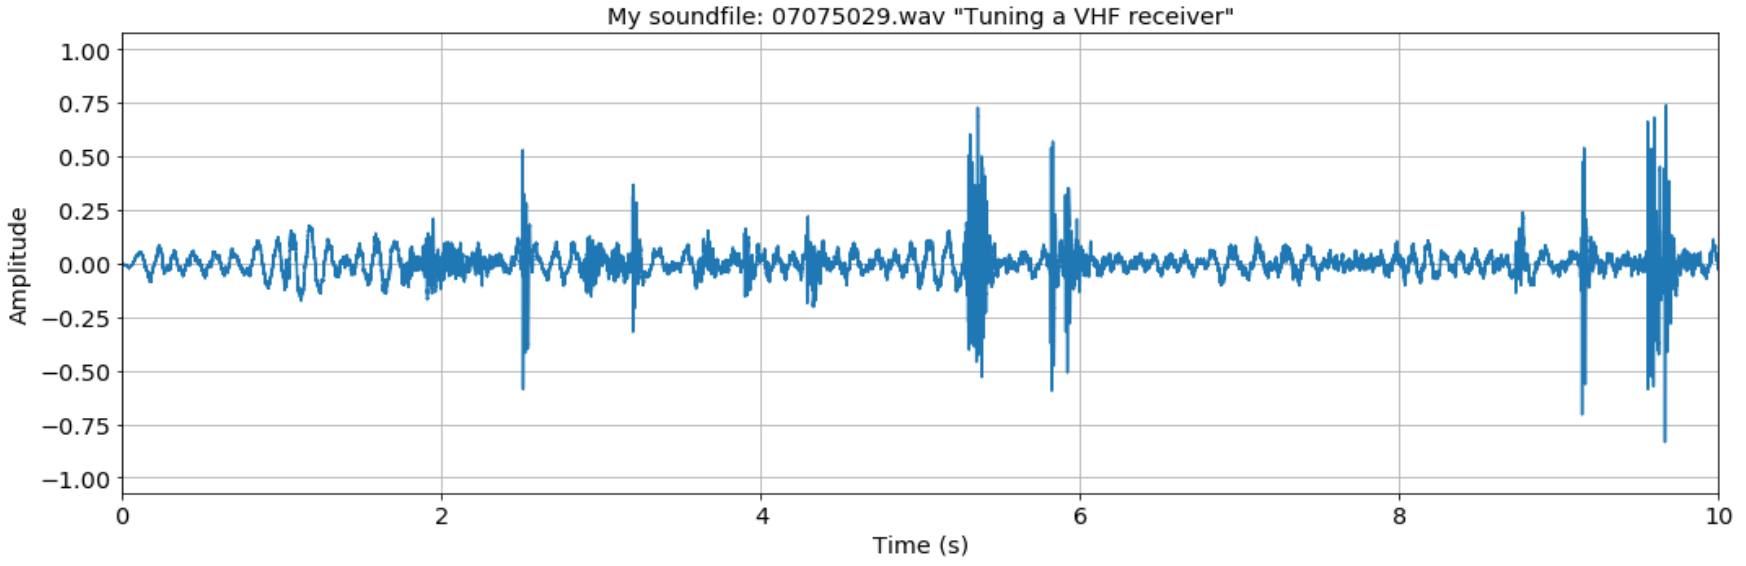

In [1]:
# Downloading and unzipping our audio file

import os
import wget
from zipfile import ZipFile

snd_dir = 'tmp/snd'
if not os.path.exists(snd_dir):
    os.makedirs(snd_dir)
    
url = 'https://sound-effects-media.bbcrewind.co.uk/zip/07042033.wav.zip?download'
filename = '07042033.wav'

# Download
file = wget.download(url, snd_dir)         

# Unzip
zip = ZipFile(file)
zip.extractall(snd_dir)
zip.close

100% [..........................................................................] 7381337 / 7381337

<bound method ZipFile.close of <zipfile.ZipFile filename='tmp/snd/07042033.wav (1).zip' mode='r'>>

Text(0.5, 1.0, 'Soundfile 07042033.wav - British Birds - Channel 0')

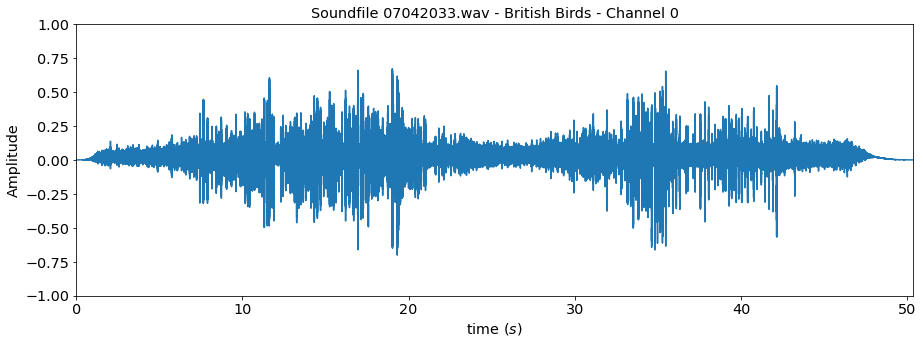

In [2]:
# Now we plot the entire audio file
import pydub
import matplotlib.pyplot as plt
import numpy as np

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# add your code below
    
#Load the sound file and some properties
sound = pydub.AudioSegment.from_file(snd_dir + '/' + filename, format="wav", duration=None,
                                     channels = 2, frame_rate = 44100, sample_width =2)

sound_mono = sound.split_to_mono()
samples = [[],[]]
samples[0] = sound_mono[0].get_array_of_samples()
samples[1] = sound_mono[1].get_array_of_samples()

# Choose either of the 2 channels that are in the audio file
ind = 0

sample_rate = sound_mono[ind].frame_rate
nr_channels = sound_mono[ind].channels
duration    = sound_mono[ind].duration_seconds

# Normalizing both channels
max_possible_amplitude_ch1 = sound_mono[0].max_possible_amplitude
max_possible_amplitude_ch2 = sound_mono[1].max_possible_amplitude
samples[0] = np.array(samples[0]) / max_possible_amplitude_ch1
samples[1] = np.array(samples[1]) / max_possible_amplitude_ch2


#Plotting
time_axis = np.arange(0, duration, 1/sample_rate)

fig, ax = plt.subplots()
ax.plot(time_axis, samples[ind])
ax.set_xlim((0,duration))
ax.set_ylim((-1,1))
ax.set_xlabel(r"time ($s$)")
ax.set_ylabel(r"Amplitude")
ax.set_title(f"Soundfile {filename} - British Birds - Channel {ind}")


2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At  about 2500 ms we see a sudden rise that decays and oscillates. At about 26 s we see a noisy waveform that has a small amplitude. 

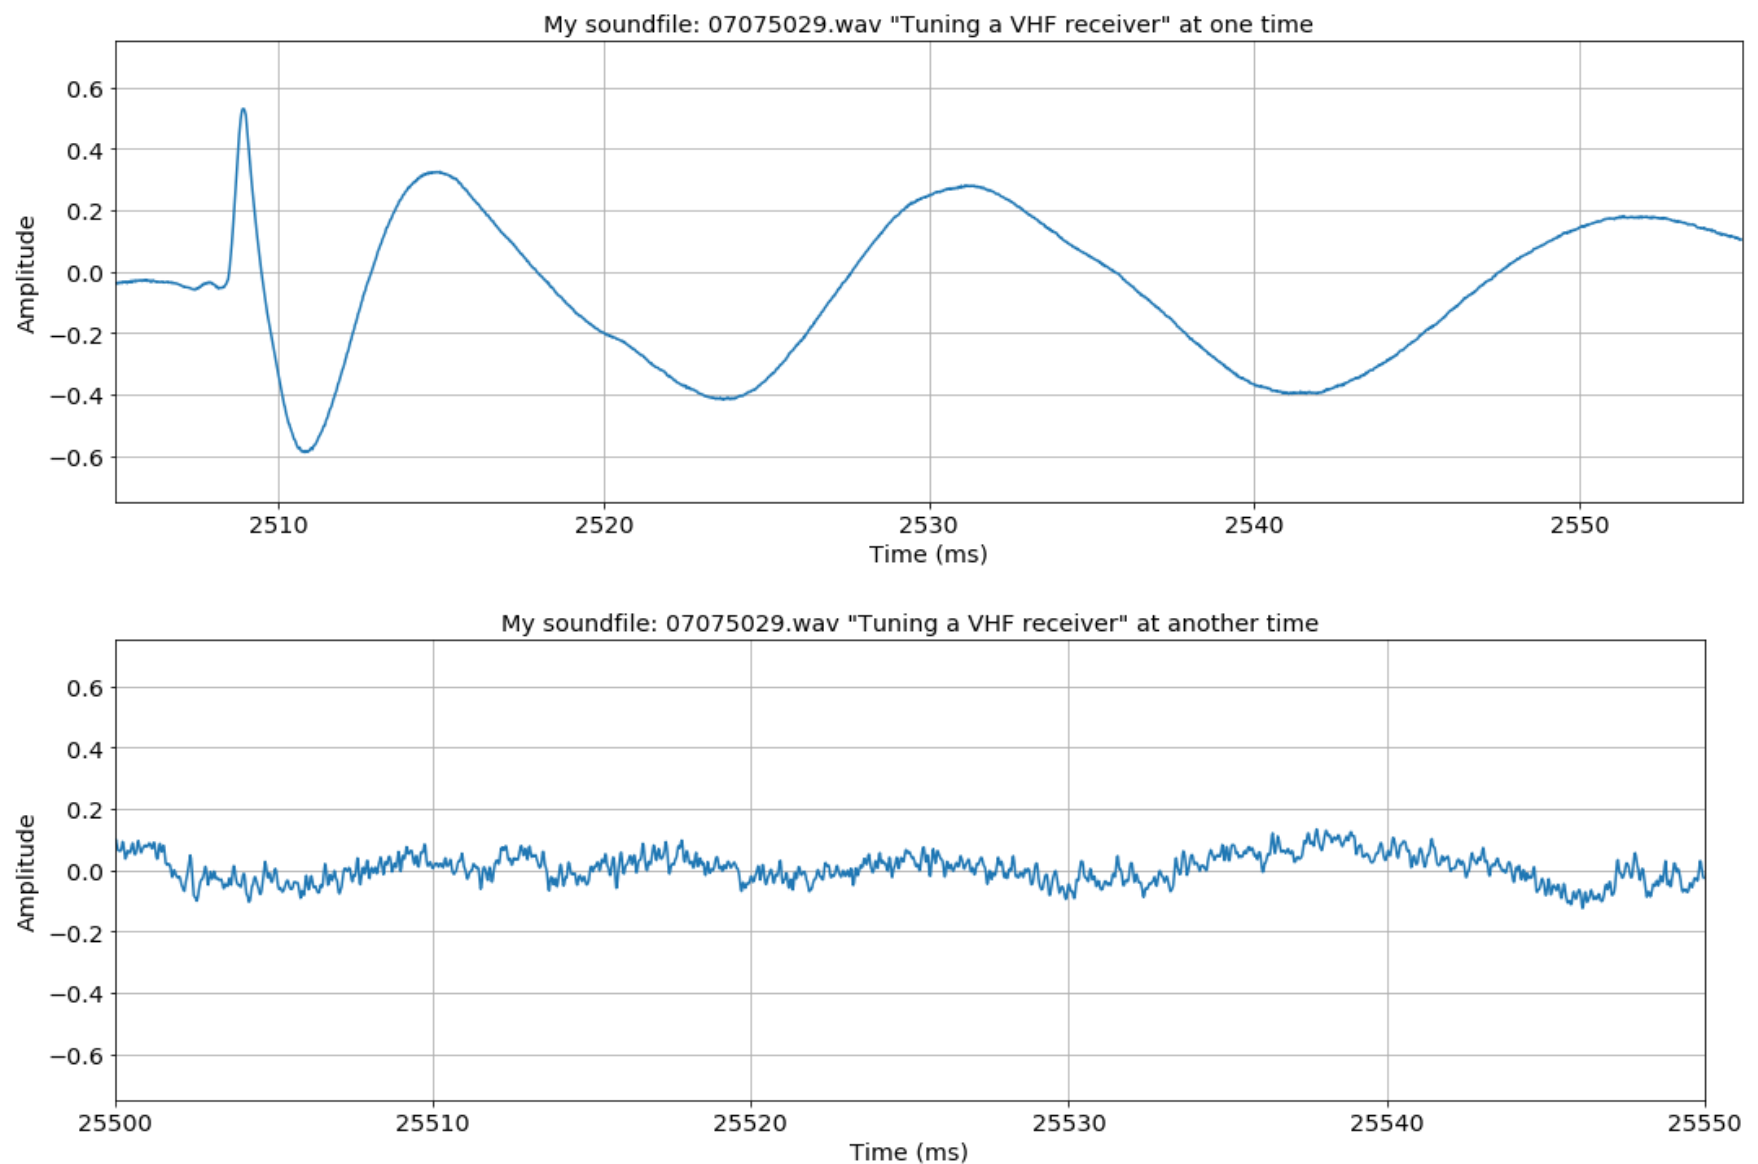

Text(0.5, 1.0, 'Soundfile 07042033.wav - British Birds - Channel 0, slice 2')

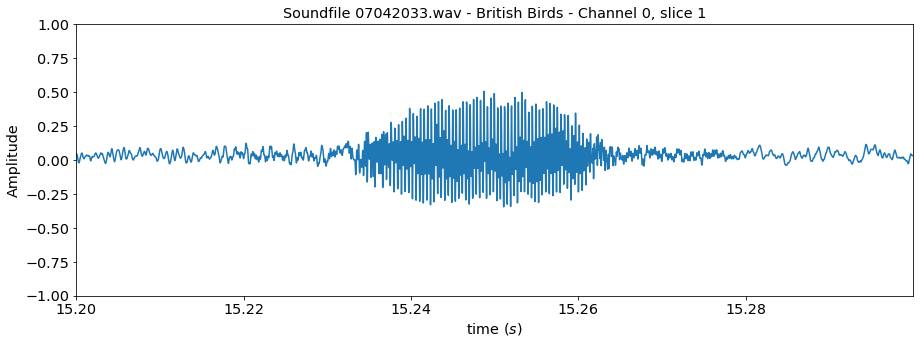

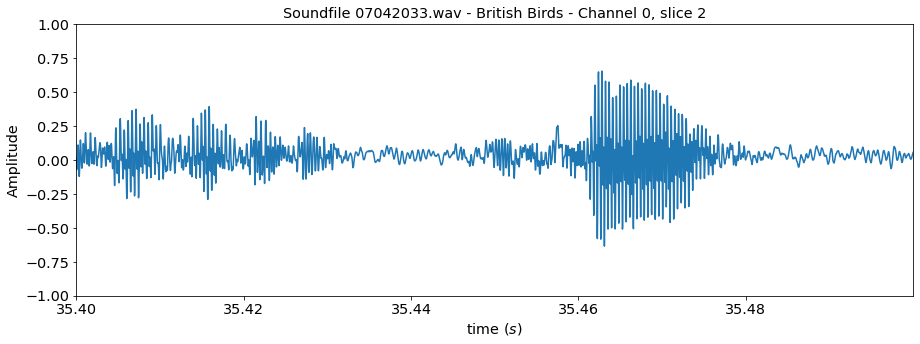

In [3]:
# add your code below

# Choose two interesting time intervals of length 0.1s
time_interval = 0.1
time_interval1 = [15.2, 15.3]
time_interval2 = [35.4, 35.5]

# Slicing the time axis and audio samples
num_samples1 = int((time_interval1[1] - time_interval1[0]) * sample_rate)
num_samples2 = int((time_interval2[1] - time_interval2[0]) * sample_rate)

slice1_first_idx = int(time_interval1[0]*sample_rate)
slice2_first_idx = int(time_interval2[0]*sample_rate)

time_axis1 = time_axis[slice1_first_idx : slice1_first_idx + num_samples1]
time_axis2 = time_axis[slice2_first_idx : slice2_first_idx + num_samples2]

samples_slice1 = samples[ind][slice1_first_idx : slice1_first_idx + num_samples1]
samples_slice2 = samples[ind][slice2_first_idx : slice2_first_idx + num_samples2]

# Plotting
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.plot(time_axis1, samples_slice1)
ax2.plot(time_axis2, samples_slice2)

ax1.set_xlim((time_axis1[0],time_axis1[-1]))
ax1.set_ylim((-1,1))
ax1.set_xlabel(r"time ($s$)")
ax1.set_ylabel(r"Amplitude")
ax1.set_title(f"Soundfile {filename} - British Birds - Channel {ind}, slice 1")

ax2.set_xlim((time_axis2[0],time_axis2[-1]))
ax2.set_ylim((-1,1))
ax2.set_xlabel(r"time ($s$)")
ax2.set_ylabel(r"Amplitude")
ax2.set_title(f"Soundfile {filename} - British Birds - Channel {ind}, slice 2")

3. For each of the segments you looked at above, window them, and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Window the audio with 1) boxcar, or 2) Hann. (This means you will have create four plots in total , or two plots with two lines each.)

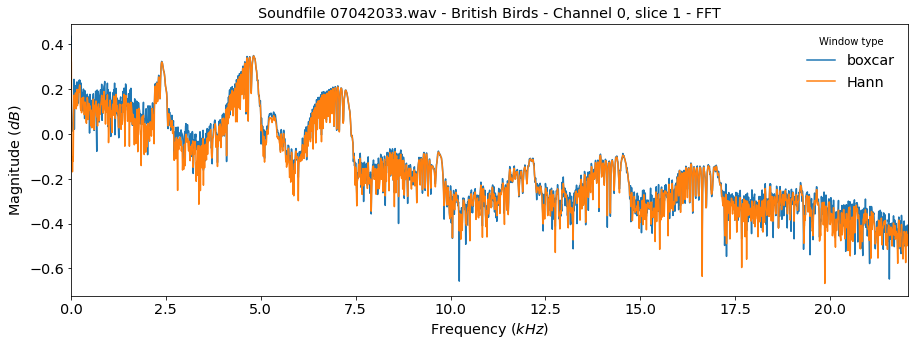

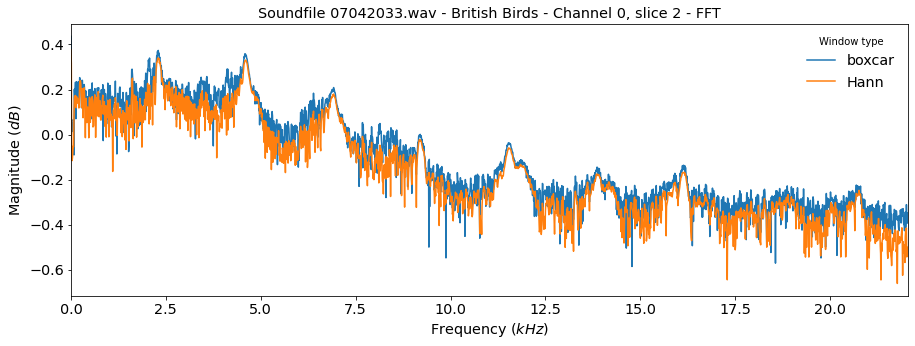

In [4]:
# add your code below
from scipy.signal import get_window

def FFT_window_segment(sample_slice, window_type):
    """
    Computes the FFT magnitude and phase of an audio sample with a certain window type
    The window size is equal to the sample size
    """
    window = get_window(window_type, len(sample_slice))
    windowed_sample = window*sample_slice
    FFT_windowed_sample = np.fft.fft(windowed_sample)
    mag = np.abs(FFT_windowed_sample)
    phase = np.angle(FFT_windowed_sample)
    return mag, phase

Nyquist = sample_rate/2 
Nyquist_idx = int(Nyquist * time_interval)                    # index of the Nyquist frequency
frequencies = np.arange(0, Nyquist, 1/time_interval) /1000    # (kHz)  # the resolution is 1/time_interval Hz

# Compute the FFT for the different segments with both boxcar and Hann window
mag1_b, phase1_b = FFT_window_segment(samples_slice1, 'boxcar')
mag1_h, phase1_h = FFT_window_segment(samples_slice1, 'hann')

mag2_b, phase2_b = FFT_window_segment(samples_slice2, 'boxcar')
mag2_h, phase2_h = FFT_window_segment(samples_slice2, 'hann')


# Plotting
fig1, ax1 = plt.subplots()
ax1.plot(frequencies, np.log10(mag1_b[:Nyquist_idx])/5, label='boxcar')
ax1.plot(frequencies, np.log10(mag1_h[:Nyquist_idx])/5, label='Hann')
ax1.set_xlim((0,Nyquist/1000))
ax1.set_title(f"Soundfile {filename} - British Birds - Channel {ind}, slice 1 - FFT")
ax1.set_xlabel(r'Frequency $(kHz)$')
ax1.set_ylabel(r'Magnitude $(dB)$')
ax1.legend(title='Window type', frameon=False)

fig2, ax2 = plt.subplots()
ax2.plot(frequencies, np.log10(mag2_b[:Nyquist_idx])/5, label='boxcar')
ax2.plot(frequencies, np.log10(mag2_h[:Nyquist_idx])/5, label='Hann')
ax2.set_xlim((0,Nyquist/1000))
ax2.set_title(f"Soundfile {filename} - British Birds - Channel {ind}, slice 2 - FFT" )
ax2.set_xlabel(r'Frequency $(kHz)$')
ax2.set_ylabel(r'Magnitude $(dB)$')
ax2.legend(title='Window type', frameon=False)

4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

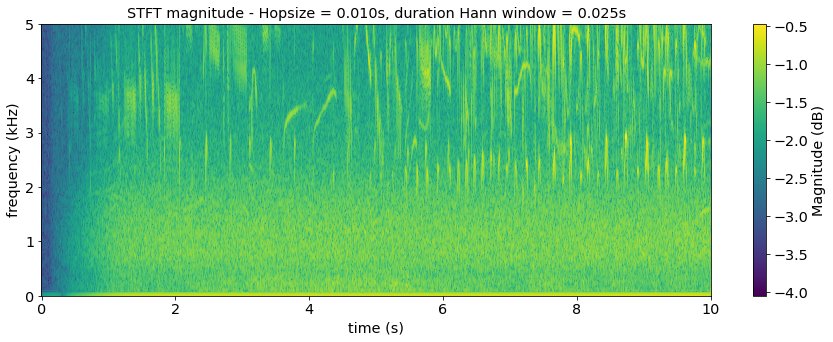

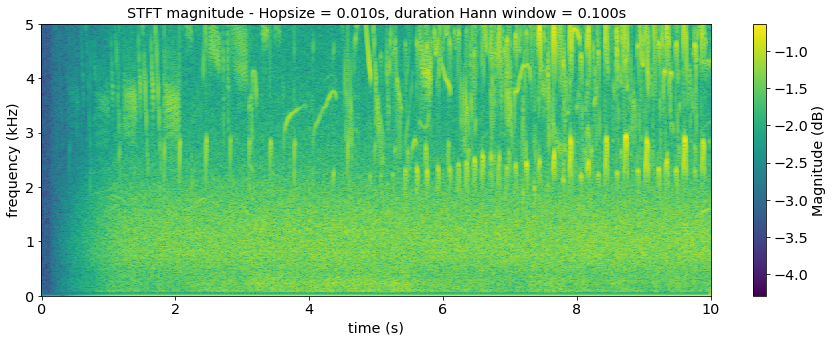

In [5]:
# add your code below
from scipy.signal import stft

# Slice first 10s
num_samples_in_10s = int(10 * sample_rate)
start = int(num_samples_in_10s * 0)
end   = int(num_samples_in_10s * 1)
time_axis10s = time_axis[start : end]
samples_slice10s = samples[ind][start : end]

nperseg1 = 0.025 * sample_rate       # Length of each segment = window duration
hopsize1 = 0.010 * sample_rate
noverlap1 = nperseg1 - hopsize1      # Number of points to overlap between segments, = nperseg - hopsize

nperseg2 = 0.100 * sample_rate       # Length of each segment = window duration
hopsize2 = 0.010 * sample_rate
noverlap2 = nperseg2 - hopsize2      # Number of points to overlap between segments, = nperseg - hopsize

# Compute short-time Fourier transform
f1, t1, Zxx1 = stft(samples_slice10s, fs=sample_rate, window='hann', nperseg=nperseg1, noverlap=noverlap1, nfft=8192)
f2, t2, Zxx2 = stft(samples_slice10s, fs=sample_rate, window='hann', nperseg=nperseg2, noverlap=noverlap2, nfft=8192)
                     
# Get the right units
f1_kHz = f1/1000
f2_kHz = f2/1000

dB_mag1 = np.log(np.abs(Zxx1))/5
dB_mag2 = np.log(np.abs(Zxx2))/5
    
#Plotting
fig1, ax1 = plt.subplots()                     
im1 = ax1.pcolormesh(t1, f1_kHz, dB_mag1, shading='nearest', cmap='viridis')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('frequency (kHz)')
ax1.set_ylim((0,5))
ax1.set_title(f'STFT magnitude - Hopsize = 0.010s, duration Hann window = 0.025s')
fig1.colorbar(im1, label = 'Magnitude (dB)')

fig2, ax2 = plt.subplots()                     
im2 = ax2.pcolormesh(t2, f2_kHz, dB_mag2, shading='nearest', cmap='viridis')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('frequency (kHz)')
ax2.set_ylim((0,5))
ax2.set_title(f'STFT magnitude - Hopsize = 0.010s, duration Hann window = 0.100s')
fig2.colorbar(im2, label = 'Magnitude (dB)')

5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency
analysis.

A long time window takes more 'musical information' into account and therefore there are probably more frequencies present in this window. This reduces the frequency resolution of the STFT. A very short time window has a high frequency resolution but loses the temporal relations between the different parts. Therefore, a trade-off has to be made.

6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

[Text(0.5, 1.0, 'Mel-frequency spectrogram, Power magnitude - 25 ms Hann window - 10 ms hop'),
 Text(0.5, 0, 'time (s)'),
 Text(0, 0.5, 'Frequency (Hz)')]

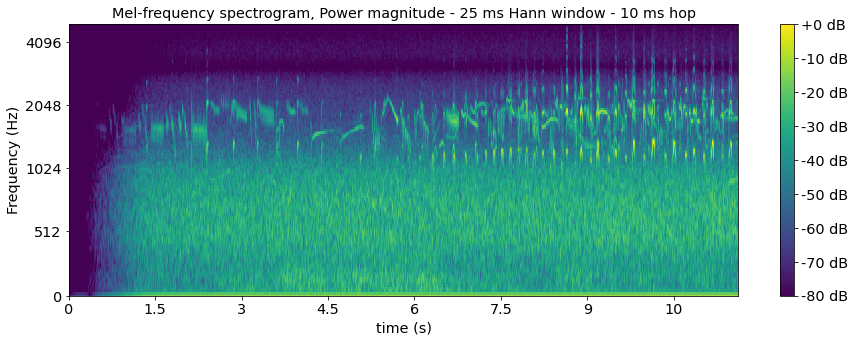

In [6]:
import librosa
import librosa.display

hop_length = int(0.010 * sample_rate)
win_length = int(0.025 * sample_rate)


Mel_spectogram = librosa.feature.melspectrogram(y=samples_slice10s,
                               sr=sample_rate,
                               n_fft=8192,
                               hop_length=hop_length,
                               win_length=win_length,
                               window='hann',
                               n_mels = 128,
                               power=2.0)   # power=2 gives the power spectrum

# center true/false?

# Compute power in dB relative to peak power
S_dB = librosa.power_to_db(Mel_spectogram, ref=np.max) 


# Plotting
fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate, fmax=5000, ax=ax, cmap='viridis')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram, Power magnitude - 25 ms Hann window - 10 ms hop',
       xlabel = 'time (s)',
       ylabel = 'Frequency (Hz)')

# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [52]:
# add your code below

def count_zero_crossings(sample):
    #n_ones = np.where(np.diff(np.sign(sample))==0)[0]
    #n_zeros = np.shape(sample)[0] - np.shape(n_ones)[0]
    
    n_zeros = np.shape(np.nonzero(np.diff(np.sign(sample))))[1]
    
    return n_zeros

n_zeros = count_zero_crossings(samples_slice10s)
print(n_zeros)


frame_size = 100
hop_size = 50


def slice_and_count_zeros(sample, frame_size, hop_size):
    
    L = np.shape(sample)[0]
    
    k = int((L - frame_size) / hop_size) 
    
    print("L", L)
    print("k", k)
    
    n_zeros = np.zeros((k+1,))
    
    for i in range(k + 1):
        
        n_zeros[i] = count_zero_crossings(sample[i*hop_size : i*hop_size + frame_size])
        
    return n_zeros

nzeros = slice_and_count_zeros(a, 5, 1)
print(nzeros)

25848
L 9
k 4
[2. 1. 1. 2. 3.]


2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

20286
10143
L 2219994
k 216


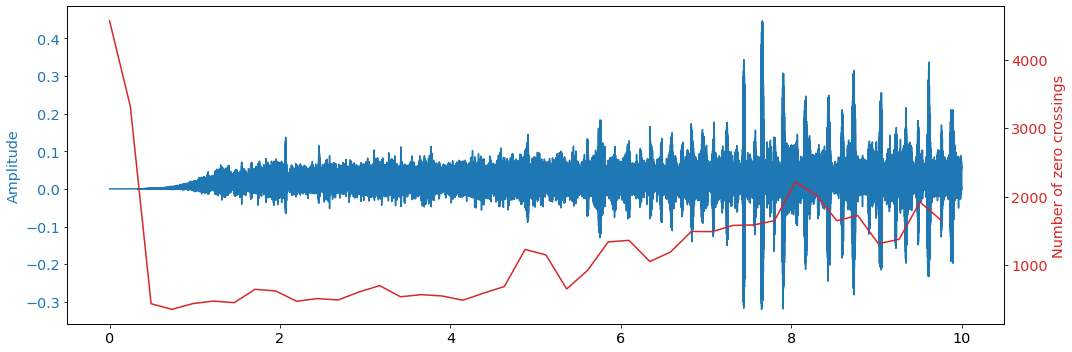

In [59]:
# add your code below

window_time_frame = 0.46
frame_size = int(sample_rate * window_time_frame)
hop_size = int(frame_size / 2)

time = 10
time_size = int(time * sample_rate)

print(frame_size)
print(hop_size)

nzeros = slice_and_count_zeros(samples[0], frame_size, hop_size)
nsamples = int( (time_size - frame_size) / hop_size)

nzeros = nzeros[:nsamples]

sample = samples[0][:time_size]


fig, ax1 = plt.subplots()


color = 'tab:blue'
ax1.set_ylabel('Amplitude', color=color)  # we already handled the x-label with ax1
ax1.plot(time_axis2, sample, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Number of zero crossings', color=color)
ax2.plot(time_axis1, nzeros, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [9]:
# add your code below


4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

In [10]:
# add your code below


5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

In [11]:
# add your code below
